#탐색적 데이터 분석

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
data_path = '/content/drive/MyDrive/쿠글/1차프로젝트 데이터/'

raw_df = pd.read_csv(data_path + 'train.csv')
raw_test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

##데이터 둘러보기

In [ ]:
raw_df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [ ]:
raw_test.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


고유값 의미

1. **cap-shape** (갓 모양)
- bell = b
- conical = c
- convex = x
- flat = f
- knobbed = k
- sunken = s

2. **cap-surface** (갓 표면)
- fibrous = f
- grooves = g
- scaly = y
- smooth = s

3. **cap-color** (갓 색상)
- brown = n
- buff = b
- cinnamon = c
- gray = g
- green = r
- pink = p
- purple = u
- red = e
- white = w
- yellow = y

4. **bruises?** (상처 여부)
- bruises = t
- no = f

5. **odor** (냄새)
- almond = a
- anise = l
- creosote = c
- fishy = y
- foul = f
- musty = m
- none = n
- pungent = p
- spicy = s

6. **gill-attachment** (주름살 부착)
- attached = a
- descending = d
- free = f
- notched = n

7. **gill-spacing** (주름살 간격)
- close = c
- crowded = w
- distant = d

8. **gill-size** (주름살 크기)
- broad = b
- narrow = n

9. **gill-color** (주름살 색상)
- black = k
- brown = n
- buff = b
- chocolate = h
- gray = g
- green = r
- orange = o
- pink = p
- purple = u
- red = e
- white = w
- yellow = y

10. **stalk-shape** (자루 모양)
- enlarging = e
- tapering = t

11. **stalk-root** (자루 뿌리)
- bulbous = b
- club = c
- cup = u
- equal = e
- rhizomorphs = z
- rooted = r
- missing = ?

12. **stalk-surface-above-ring** (고리 위 자루 표면)
- fibrous = f
- scaly = y
- silky = k
- smooth = s

13. **stalk-surface-below-ring** (고리 아래 자루 표면)
- fibrous = f
- scaly = y
- silky = k
- smooth = s

14. **stalk-color-above-ring** (고리 위 자루 색상)
- brown = n
- buff = b
- cinnamon = c
- gray = g
- orange = o
- pink = p
- red = e
- white = w
- yellow = y

15. **stalk-color-below-ring** (고리 아래 자루 색상)
- brown = n
- buff = b
- cinnamon = c
- gray = g
- orange = o
- pink = p
- red = e
- white = w
- yellow = y

16. **veil-type** (덮개 유형)
- partial = p
- universal = u

17. **veil-color** (덮개 색상)
- brown = n
- orange = o
- white = w
- yellow = y

18. **ring-number** (고리 개수)
- none = n
- one = o
- two = t

19. **ring-type** (고리 유형)
- cobwebby = c
- evanescent = e
- flaring = f
- large = l
- none = n
- pendant = p
- sheathing = s
- zone = z

20. **spore-print-color** (포자 인쇄 색상)
- black = k
- brown = n
- buff = b
- chocolate = h
- green = r
- orange = o
- purple = u
- white = w
- yellow = y

21. **population** (분포)
- abundant = a
- clustered = c
- numerous = n
- scattered = s
- several = v
- solitary = y

22. **habitat** (서식지)
- grasses = g
- leaves = l
- meadows = m
- paths = p
- urban = u
- waste = w
- woods = d

In [ ]:
raw_df.shape, raw_test.shape

((3116945, 22), (2077964, 21))

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

결측치 확인

In [ ]:
raw_df.isnull().sum()

,0
id,0
class,0
cap-diameter,4
cap-shape,40
cap-surface,671023
cap-color,12
does-bruise-or-bleed,8
gill-attachment,523936
gill-spacing,1258435
gill-color,57


In [ ]:
#한글 폰트 설치 및 불러오기
!pip install koreanize-matplotlib

import koreanize_matplotlib

<Axes: >

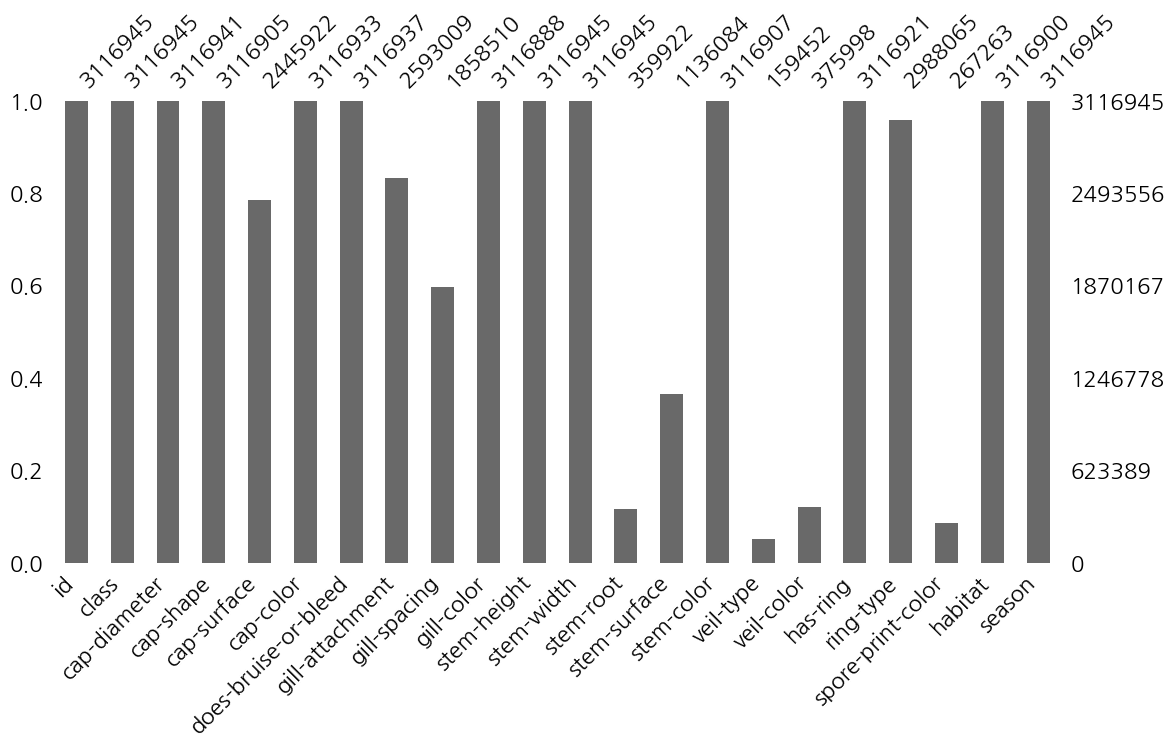

In [ ]:
import numpy as np
import missingno as msno

msno.bar(df = raw_df,figsize=(13,6))

피처 요약표

In [ ]:
from sys import is_finalizing

def resumetable(df):
  print(f'데이터셋 형상: {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns = {'index':'피처'})
  summary['결측값 개수'] = df.isnull().sum().values
  summary['고유값 개수'] = df.nunique().values
  summary['데이터 종류']= None
  for col in df.columns:
    if df[col].nunique() == 2:
      summary.loc[summary['피처'] == col, '데이터 종류'] = '이진형'
    elif df[col].dtype == 'object':
      summary.loc[summary['피처'] == col, '데이터 종류'] = '범주형'
    else:
      summary.loc[summary['피처'] == col, '데이터 종류'] = '연속형'
  return summary

resumetable(raw_df)

데이터셋 형상: (3116945, 22)


,피처,데이터 타입,결측값 개수,고유값 개수,데이터 종류
0,id,int64,0,3116945,연속형
1,class,object,0,2,이진형
2,cap-diameter,float64,4,3913,연속형
3,cap-shape,object,40,74,범주형
4,cap-surface,object,671023,83,범주형
5,cap-color,object,12,78,범주형
6,does-bruise-or-bleed,object,8,26,범주형
7,gill-attachment,object,523936,78,범주형
8,gill-spacing,object,1258435,48,범주형
9,gill-color,object,57,63,범주형


##데이터 정제

id 제거

In [ ]:
df = raw_df.drop(['id'], axis=1)
test = raw_test.drop(['id'], axis=1)

Binary encoding

In [ ]:
df['class'] = df['class'].map({'p': 0, 'e': 1})

###결측치 처리

In [ ]:
#train 데이터
# 각 열의 결측치 개수
null_counts = df.isnull().sum()

# 각 열의 결측치 비율
null_percentage = (df.isnull().sum() / len(df)) * 100

# 결측치 개수와 비율을  dataframe을 통해 확인
missing_data = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentage, 'dtype': df.dtypes })
print(missing_data)

                      Null Count  Null Percentage    dtype
class                          0         0.000000    int64
cap-diameter                   4         0.000128  float64
cap-shape                     40         0.001283   object
cap-surface               671023        21.528227   object
cap-color                     12         0.000385   object
does-bruise-or-bleed           8         0.000257   object
gill-attachment           523936        16.809280   object
gill-spacing             1258435        40.373988   object
gill-color                    57         0.001829   object
stem-height                    0         0.000000  float64
stem-width                     0         0.000000  float64
stem-root                2757023        88.452732   object
stem-surface             1980861        63.551362   object
stem-color                    38         0.001219   object
veil-type                2957493        94.884350   object
veil-color               2740947        87.936970   obje

In [ ]:
#test 데이터
# 각 열의 결측치 개수
test_null_counts = test.isnull().sum()

# 각 열의 결측치 비율
test_null_percentage = (test.isnull().sum() / len(test)) * 100

# 결측치 개수와 비율을  dataframe을 통해 확인
test_missing_data = pd.DataFrame({'Null Count': test_null_counts, 'Null Percentage': test_null_percentage, 'dtype': test.dtypes })
print(test_missing_data)

                      Null Count  Null Percentage    dtype
cap-diameter                   7         0.000337  float64
cap-shape                     31         0.001492   object
cap-surface               446904        21.506821   object
cap-color                     13         0.000626   object
does-bruise-or-bleed          10         0.000481   object
gill-attachment           349821        16.834796   object
gill-spacing              839595        40.404694   object
gill-color                    49         0.002358   object
stem-height                    1         0.000048  float64
stem-width                     0         0.000000  float64
stem-root                1838012        88.452543   object
stem-surface             1321488        63.595327   object
stem-color                    21         0.001011   object
veil-type                1971545        94.878689   object
veil-color               1826124        87.880445   object
has-ring                      19         0.000914   obje

결측치 제거

In [ ]:
# 결측치 비율에 대한 역치값 설정
threshold = 30

# 결측치 비율이 30% 이상인 열 확인
columns_to_drop = missing_data[missing_data['Null Percentage'] > threshold].index
print(columns_to_drop, '\n')

test_columns_to_drop = test_missing_data[test_missing_data['Null Percentage'] > threshold].index
print(test_columns_to_drop, '\n')

print('same' if set(test_columns_to_drop) == set(columns_to_drop) else 'different')

Index(['gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color',
       'spore-print-color'],
      dtype='object') 

Index(['gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color',
       'spore-print-color'],
      dtype='object') 

same


In [ ]:
# 결측치 비율이 30% 이상인 열 제거
df_cleaned = df.drop(columns=columns_to_drop)
test_cleaned = test.drop(columns=test_columns_to_drop)

결측치 채우기

In [ ]:
resumetable(df_cleaned)

데이터셋 형상: (3116945, 15)


,피처,데이터 타입,결측값 개수,고유값 개수,데이터 종류
0,class,int64,0,2,이진형
1,cap-diameter,float64,4,3913,연속형
2,cap-shape,object,40,74,범주형
3,cap-surface,object,671023,83,범주형
4,cap-color,object,12,78,범주형
5,does-bruise-or-bleed,object,8,26,범주형
6,gill-attachment,object,523936,78,범주형
7,gill-color,object,57,63,범주형
8,stem-height,float64,0,2749,연속형
9,stem-width,float64,0,5836,연속형


In [ ]:
# cap-surface의 결측치는 cap-color와 does-bruise-or-bleed를 기준으로 그룹화하여 채움
df_cleaned['cap-surface'] = df_cleaned.groupby(['cap-color', 'does-bruise-or-bleed'])['cap-surface'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# gill-attachment의 결측치는 gill-color와 has-ring을 기준으로 그룹화하여 채움
df_cleaned['gill-attachment'] = df_cleaned.groupby(['gill-color', 'has-ring'])['gill-attachment'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# ring-type의 결측치는 does-bruise-or-bleed와 has-ring을 기준으로 그룹화하여 채움
df_cleaned['ring-type'] = df_cleaned.groupby(['does-bruise-or-bleed', 'has-ring'])['ring-type'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [ ]:
test_cleaned['cap-surface'] = test_cleaned.groupby(['cap-color', 'does-bruise-or-bleed'])['cap-surface'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
test_cleaned['gill-attachment'] = test_cleaned.groupby(['gill-color', 'has-ring'])['gill-attachment'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
test_cleaned['ring-type'] = test_cleaned.groupby(['does-bruise-or-bleed', 'has-ring'])['ring-type'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [ ]:
# 범주형인 경우 - 최빈값으로 채우기 (mode())
#연속형 변수의 경우 - median, mean으로 채움.
df_cleaned['cap-diameter'].fillna(df_cleaned['cap-diameter'].median(), inplace=True)
df_cleaned['cap-shape'].fillna(df_cleaned['cap-shape'].mode()[0], inplace=True)
df_cleaned['cap-surface'].fillna(df_cleaned['cap-surface'].mode()[0], inplace=True)
df_cleaned['cap-color'].fillna(df_cleaned['cap-color'].mode()[0], inplace=True)
df_cleaned['does-bruise-or-bleed'].fillna(df_cleaned['does-bruise-or-bleed'].mode()[0], inplace=True)
df_cleaned['gill-attachment'].fillna(df_cleaned['gill-attachment'].mode()[0], inplace=True)
df_cleaned['gill-color'].fillna(df_cleaned['gill-color'].mode()[0], inplace=True)
df_cleaned['stem-color'].fillna(df_cleaned['stem-color'].mode()[0], inplace=True)
df_cleaned['has-ring'].fillna(df_cleaned['has-ring'].mode()[0], inplace=True)
df_cleaned['ring-type'].fillna(df_cleaned['ring-type'].mode()[0], inplace=True)
df_cleaned['habitat'].fillna(df_cleaned['habitat'].mode()[0], inplace=True)

<ipython-input-18-cb16e588006e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['cap-diameter'].fillna(df_cleaned['cap-diameter'].median(), inplace=True)
<ipython-input-18-cb16e588006e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [ ]:
test_cleaned['cap-diameter'].fillna(test_cleaned['cap-diameter'].median(), inplace=True)
test_cleaned['cap-shape'].fillna(test_cleaned['cap-shape'].mode()[0], inplace=True)
test_cleaned['cap-surface'].fillna(test_cleaned['cap-surface'].mode()[0], inplace=True)
test_cleaned['cap-color'].fillna(test_cleaned['cap-color'].mode()[0], inplace=True)
test_cleaned['does-bruise-or-bleed'].fillna(test_cleaned['does-bruise-or-bleed'].mode()[0], inplace=True)
test_cleaned['gill-attachment'].fillna(test_cleaned['gill-attachment'].mode()[0], inplace=True)
test_cleaned['gill-color'].fillna(test_cleaned['gill-color'].mode()[0], inplace=True)
test_cleaned['stem-color'].fillna(test_cleaned['stem-color'].mode()[0], inplace=True)
test_cleaned['has-ring'].fillna(test_cleaned['has-ring'].mode()[0], inplace=True)
test_cleaned['ring-type'].fillna(test_cleaned['ring-type'].mode()[0], inplace=True)
test_cleaned['habitat'].fillna(test_cleaned['habitat'].mode()[0], inplace=True)

<ipython-input-19-6666362f1870>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_cleaned['cap-diameter'].fillna(test_cleaned['cap-diameter'].median(), inplace=True)
<ipython-input-19-6666362f1870>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

###고유값 처리

In [ ]:
resumetable(df_cleaned)

데이터셋 형상: (3116945, 15)


,피처,데이터 타입,결측값 개수,고유값 개수,데이터 종류
0,class,int64,0,2,이진형
1,cap-diameter,float64,0,3913,연속형
2,cap-shape,object,0,74,범주형
3,cap-surface,object,0,84,범주형
4,cap-color,object,0,78,범주형
5,does-bruise-or-bleed,object,0,26,범주형
6,gill-attachment,object,0,78,범주형
7,gill-color,object,0,63,범주형
8,stem-height,float64,0,2749,연속형
9,stem-width,float64,0,5836,연속형


In [ ]:
summary = resumetable(df_cleaned)
categorical_columns = summary[summary['데이터 종류']=='범주형'].피처

데이터셋 형상: (3116945, 15)


In [ ]:
#빈도 낮은 것 unknown으로 대체
def replace_infrequent_categories(df, column, threshold=70):
    value_counts = df[column].value_counts()
    infrequent = value_counts[value_counts <= threshold].index
    df[column] = df[column].apply(lambda x: "Unknown" if x in infrequent else x)
    return df

# 범주형 피처 handling
for col in categorical_columns:
    df_cleaned = replace_infrequent_categories(df_cleaned, col)

# unique 컬럼 확인
resumetable(df_cleaned)

데이터셋 형상: (3116945, 15)


,피처,데이터 타입,결측값 개수,고유값 개수,데이터 종류
0,class,int64,0,2,이진형
1,cap-diameter,float64,0,3913,연속형
2,cap-shape,object,0,8,범주형
3,cap-surface,object,0,14,범주형
4,cap-color,object,0,13,범주형
5,does-bruise-or-bleed,object,0,3,범주형
6,gill-attachment,object,0,9,범주형
7,gill-color,object,0,13,범주형
8,stem-height,float64,0,2749,연속형
9,stem-width,float64,0,5836,연속형


In [ ]:
summary = resumetable(test_cleaned)
categorical_columns = summary[summary['데이터 종류']=='범주형'].피처

for col in categorical_columns:
    test_cleaned = replace_infrequent_categories(test_cleaned, col)

데이터셋 형상: (2077964, 14)


###정제된 데이터 시각화

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import skew

In [ ]:
df1 = df_cleaned.copy()
test1 = test_cleaned.copy()

In [ ]:
df1.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,8.80,f,s,u,f,a,w,4.51,15.39,w,f,f,d,a
1,0,4.51,x,h,o,f,a,n,4.79,6.48,o,t,z,d,w
2,1,6.94,f,s,b,f,x,w,6.85,9.93,n,f,f,l,w
3,1,3.88,f,y,g,f,s,g,4.16,6.53,w,f,f,d,u
4,1,5.85,x,l,w,f,d,w,3.37,8.36,w,f,f,g,a


In [ ]:
test1.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,8.64,x,t,n,t,e,w,11.13,17.12,w,t,g,d,a
1,6.90,o,t,o,f,p,y,1.27,10.75,n,f,f,d,a
2,2.00,b,g,n,f,d,n,6.18,3.14,n,f,f,d,s
3,3.47,x,t,n,f,s,n,4.98,8.51,w,t,z,d,u
4,6.17,x,h,y,f,p,y,6.73,13.70,y,t,e,d,u


plot - 피처의 고유값별 e(1)와 p(0)의 비율

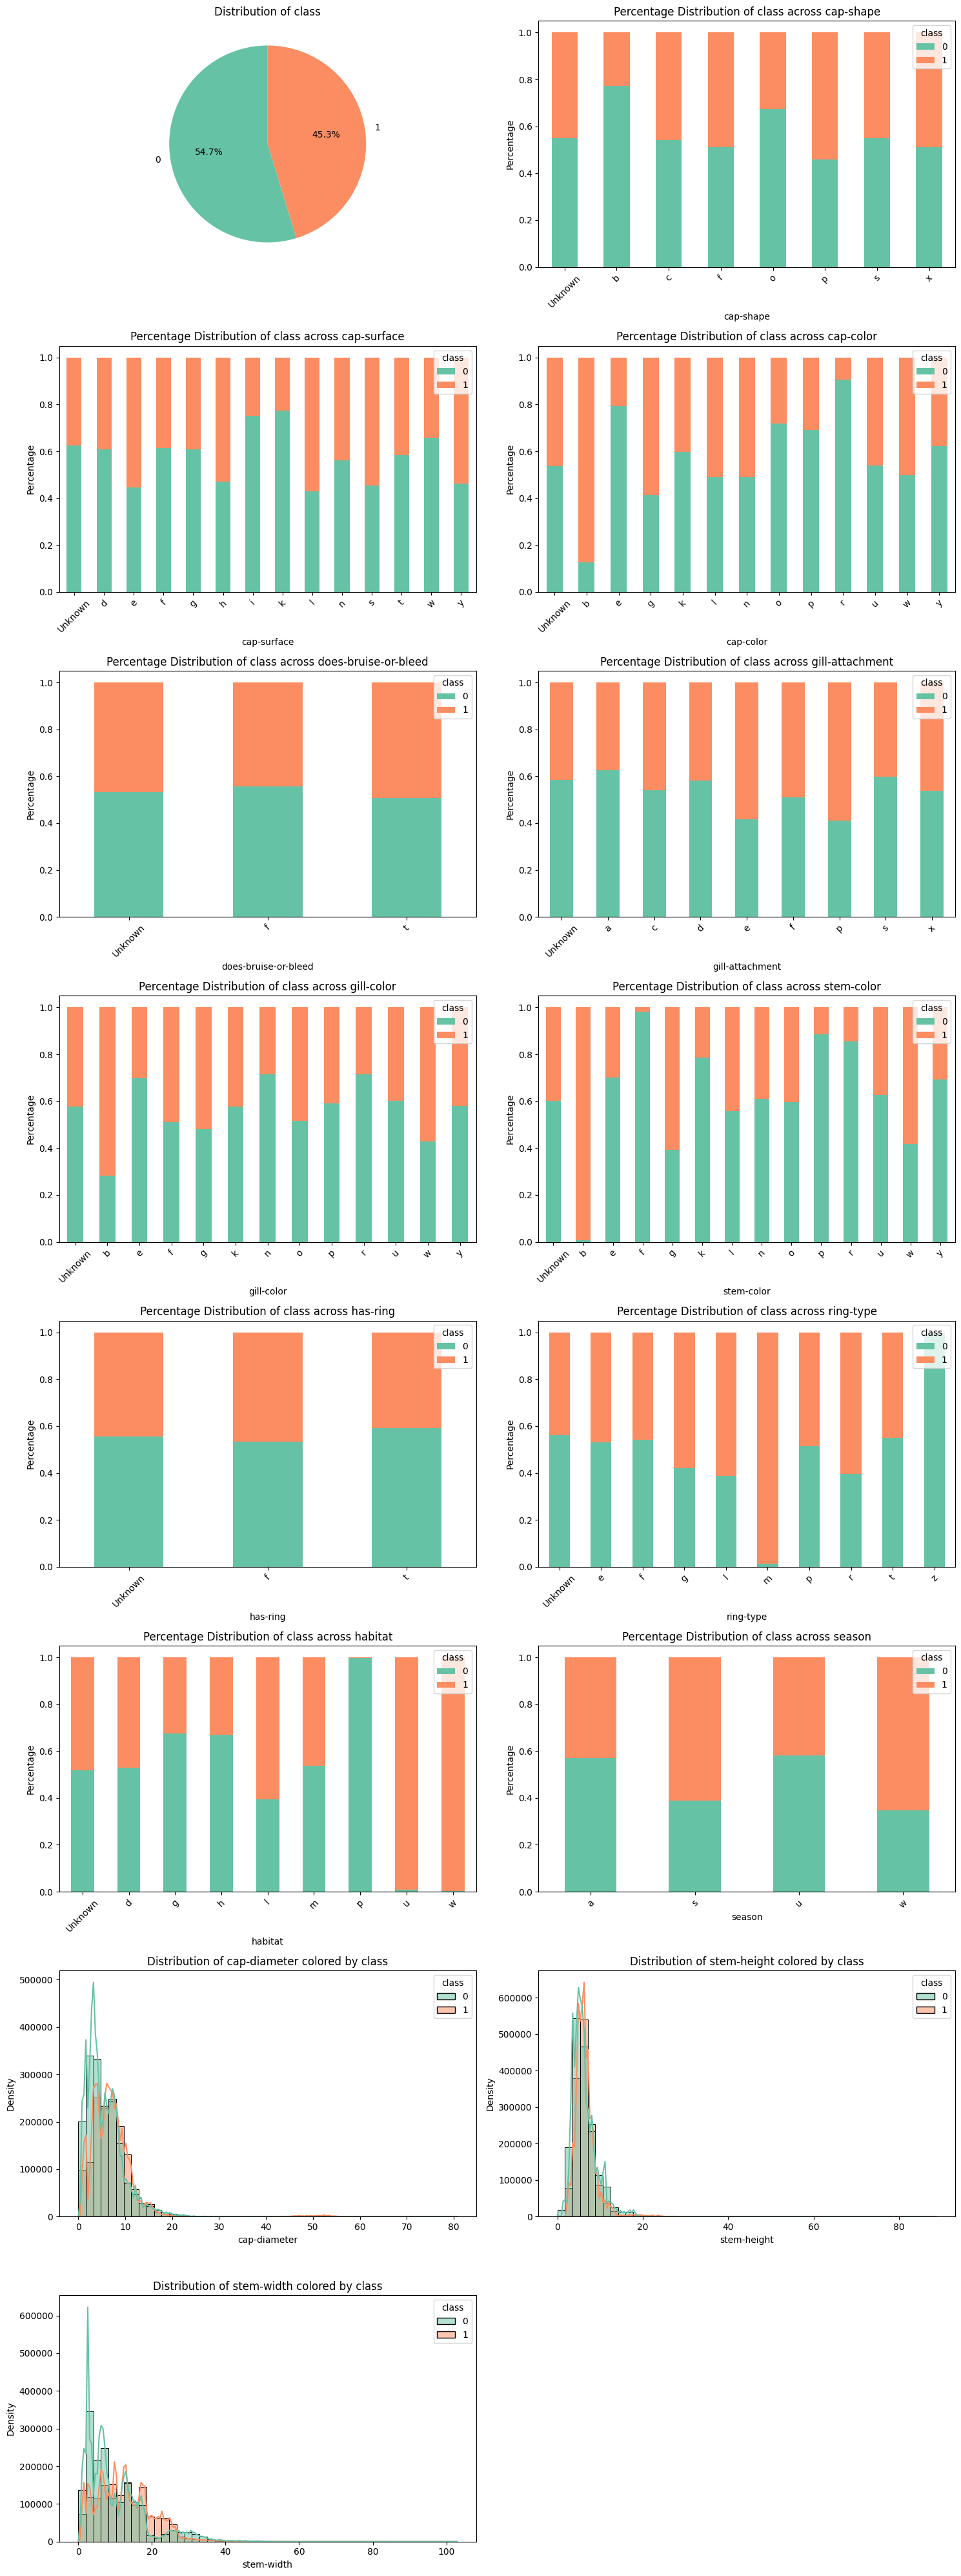

In [ ]:
def plot_feature_distributions(data, target):
    # 범주형 컬럼
    cat_cols = summary[summary['데이터 종류']=='범주형'].피처
    # 연속형 컬럼
    num_cols = summary[summary['데이터 종류']=='연속형'].피처

    # 서브플롯 개수: 범주형, 수치형 컬럼 수에 타겟 변수의 파이 차트 포함 (+1)
    total_plots = len(cat_cols) + len(num_cols) + 1  # +1은 파이 차트용
    n_cols = 2
    n_rows = int(np.ceil(total_plots / n_cols))

    # 전체 Figure 생성 및 서브플롯 배치
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axes = axes.flatten()

    # 타겟 변수에 대한 파이 차트 그리기
    target_counts = data[target].value_counts(normalize=True)
    axes[0].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], startangle=90)
    axes[0].set_title(f"Distribution of {target}")

    # 범주형 열들에 대한 분포 그래프
    for idx, col in enumerate(cat_cols):
        contingency_table = pd.crosstab(data[col], data[target], normalize='index')
        contingency_table.plot(kind="bar", stacked=True, color=['#66c2a5', '#fc8d62'], ax=axes[idx+1]) # +1은 파이 차트 자리 보정
        axes[idx+1].set_title(f"Percentage Distribution of {target} across {col}")
        axes[idx+1].set_xlabel(col)
        axes[idx+1].set_ylabel("Percentage")
        axes[idx+1].legend(title=target, loc='upper right')
        axes[idx+1].set_xticklabels(axes[idx+1].get_xticklabels(), rotation=45)

     # 연속형 열들에 대한 분포 그래프
    for idx, col in enumerate(num_cols, start=len(cat_cols) + 1):  # +1은 파이 차트 자리 보정
         # 왜도가 큰지 확인하고, 해당하는 경우 bin 조절
        if data[col].dtype != 'O' and skew(data[col]) > 0.75:
            sns.histplot(data=data, x=col, hue=target, kde=True, ax=axes[idx], palette=['#66c2a5', '#fc8d62'], bins=50, kde_kws={'bw_adjust': 0.5})
        else:
            sns.histplot(data=data, x=col, hue=target, kde=True, ax=axes[idx], palette=['#66c2a5', '#fc8d62'], bins='auto', kde_kws={'bw_adjust': 0.5})

        axes[idx].set_title(f"Distribution of {col} colored by {target}")
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel("Density")

    # 서브플롯이 홀수 개일 경우, 빈 플롯 제거
    for i in range(total_plots, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

plot_feature_distributions(df1, 'class')

#베이스라인 모델- Randomforest

Random Forest
*  여러 개의 결정 트리(Decision Tree)를 앙상블로 결합하여 예측 성능을 높이는 기법
* 부트스트랩 샘플링(Bootstrapping)을 통해 각각의 트리에 다른 샘플을 제공하여 학습
*   특성 무작위화: 각 트리의 분기마다 무작위로 선택된 일부 특성만을 사용하여 다양한 트리를 생성
*   과적합을 방지하고, 분류(Classification)와 회귀(Regression) 문제 모두에 적용 가능

##피처 엔지니어링

Labelencoding

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
def encode_features(df, label_encoders=None):
    if label_encoders is None:
        label_encoders = {}

    categorical_features = df.select_dtypes(include=['object']).columns
    for column in categorical_features:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return df, label_encoders

df1, label_encoders = encode_features(df1)

test1, _ = encode_features(test1, label_encoders)

In [ ]:
df1.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,8.80,3,10,10,1,1,11,4.51,15.39,12,1,2,1,0
1,0,4.51,7,5,7,1,1,6,4.79,6.48,8,2,9,1,3
2,1,6.94,3,10,1,1,8,11,6.85,9.93,7,1,2,4,3
3,1,3.88,3,13,3,1,7,4,4.16,6.53,12,1,2,1,2
4,1,5.85,7,8,11,1,3,11,3.37,8.36,12,1,2,2,0


In [ ]:
test1.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,8.64,7,9,6,2,3,11,11.13,17.12,12,2,3,1,0
1,6.90,4,9,7,1,5,12,1.27,10.75,7,1,2,1,0
2,2.00,1,3,6,1,2,6,6.18,3.14,7,1,2,1,1
3,3.47,7,9,6,1,6,6,4.98,8.51,12,2,8,1,2
4,6.17,7,4,12,1,5,12,6.73,13.70,13,2,1,1,2


히트맵

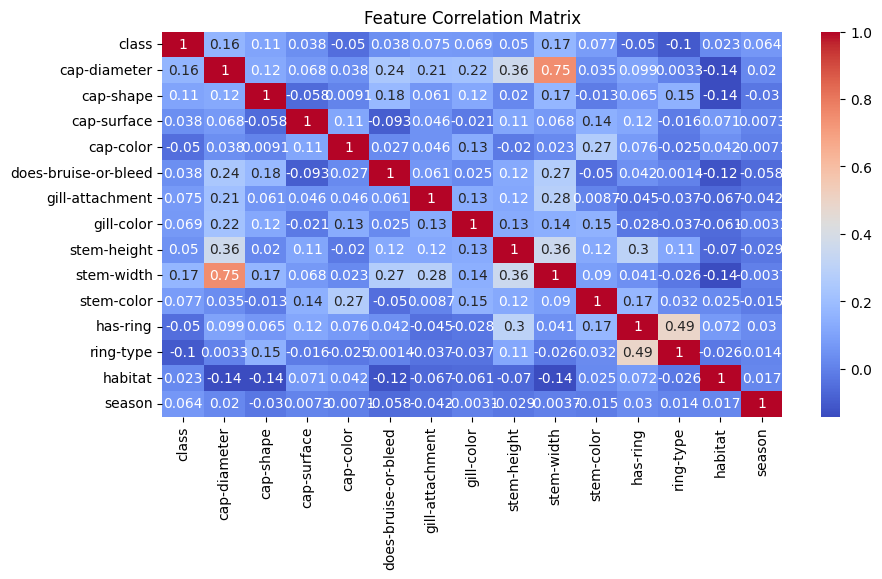

In [ ]:
# 상관 행렬 계산
corr_matrix = df1.corr()

# 히트맵으로 상관 행렬 시각화
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') #annot : 상관계수 값 표시
plt.title("Feature Correlation Matrix")
plt.show()

##모델 훈련 및 성능 검증

In [ ]:
from sklearn.metrics import  classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# classification_report : 모델의 성능을 평가할 때 사용되는 함수로, 정밀도(precision), 재현율(recall), F1 점수 등을 계산
# train_test_split : 데이터를 훈련 세트와 테스트 세트로 나누는 함수
# RandomForestClassifier: 랜덤 포레스트 분류 모델을 생성

x = df1.drop('class', axis=1)
y = df1['class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# random_state=42: 분할을 할 때 무작위성을 적용하는데, random_state를 지정해주면 항상 동일하게 데이터를 분할하여 재현성을 높일 수 있음.

model = RandomForestClassifier(random_state=42)

In [ ]:
model

RandomForestClassifier(random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    340992
           1       0.99      0.99      0.99    282397

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389



- 정밀도 (Precision): 모델이 양성(1)으로 예측한 것 중 실제로 양성인 비율입니다. 높은 정밀도는 잘못된 양성 예측(False Positives)이 적다는 뜻입니다.
- 재현율 (Recall): 실제 양성인 것 중 모델이 양성으로 잘 예측한 비율입니다. 높은 재현율은 잘못된 음성 예측(False Negatives)이 적다는 것을 의미합니다.
- F1 점수 (F1-score): 정밀도와 재현율의 조화 평균으로, 두 지표를 동시에 고려합니다. 특히 클래스 불균형이 있을 때 모델의 종합 성능을 파악하는 데 유용합니다.
- 샘플 수 (Support): 각 클래스에 속한 실제 샘플의 개수입니다.

- 정확도 (Accuracy) : 전체 데이터에서 맞게 예측한 비율
- Macro Average: 각 클래스의 정밀도, 재현율, F1 점수의 단순 평균입니다.
- Weighted Average:각 지표에 대해 샘플 수를 고려한 가중 평균입니다.

MCC점수

In [ ]:
from sklearn.metrics import matthews_corrcoef

score = matthews_corrcoef(y_test, y_pred)
print('MCC:', score)

MCC: 0.9785582524800669


혼동 행렬

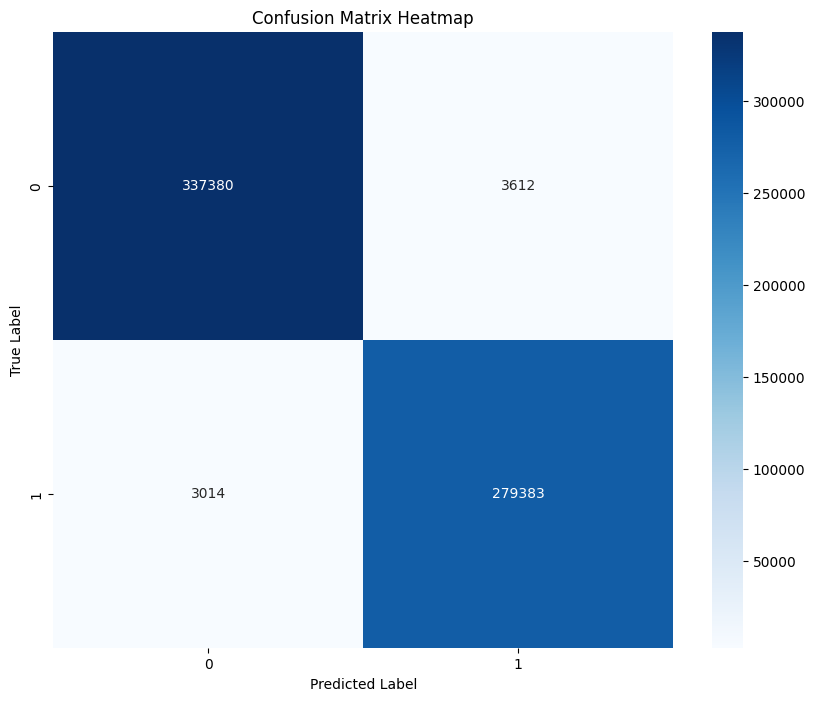

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)  # confusion matrix 생성

class_names = np.unique(y)  # y에 포함된 고유한 클래스 이름을 추출하여 class_names에 저장

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##예측 및 결과 제출

캐글 점수

In [ ]:
test_prediction = model.predict(test1)

In [ ]:
submission['class']=test_prediction
submission['class']=submission['class'].map({1:'e',0:'p'})
submission.to_csv('predd.csv',index=False)

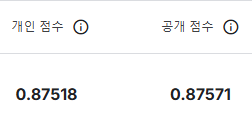

#성능 개선 - LightGBM

- Gradient Boosting
 -  약한 학습기(Weak Learner) 여러 개를 순차적으로 학습하면서 예측 오차를 점점 줄이는 기법
 - 주로 결정 트리(Decision Tree)를 사용 -> 각 단계에서 오차를 보정하기 위해 새로운 트리를 추가하는 방식
 - LightGBM은 이 Gradient Boosting 기법을 더욱 빠르고 효율적으로 구현한 모델

##하이퍼파라미터 최적화

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.5 MB/s eta 0:00:00


In [ ]:
import optuna
from optuna.samplers import TPESampler
from lightgbm import LGBMClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split

X = df1.drop('class', axis=1)
y = df1['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, shuffle=True, stratify=y, random_state=101)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Objective function
def objective(trial):
    params = {
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "verbosity": -1
    }

    model = LGBMClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return matthews_corrcoef(y_test, y_pred)

# Create study and optimize
study = optuna.create_study(direction="maximize", sampler=TPESampler(n_startup_trials=20, multivariate=True))
study.optimize(objective, n_trials=40)

print(study.best_params)

/usr/local/lib/python3.10/dist-packages/optuna/_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-11-03 13:37:00,766] A new study created in memory with name: no-name-da769480-895d-45c6-a7ab-32a72c87037f
[I 2024-11-03 13:38:04,785] Trial 0 finished with value: 0.9700816421328594 and parameters: {'lambda_l1': 1.0636475322835206, 'lambda_l2': 0.0029073732218752447, 'num_leaves': 46, 'feature_fraction': 0.6368377018820977, 'bagging_fraction': 0.6017151037697449, 'bagging_freq': 5, 'min_child_samples': 48}. Best is trial 0 with value: 0.9700816421328594.
[I 2024-11-03 13:39:08,921] Trial 1 finished with value: 0.9769160392787528 and parameters: {'lambda_l1': 5.372031921449311, 'lambda_l2': 8.98504234116024e-08, 'num_leaves': 193, 'feature_fraction': 0.6136197138323113, 'bagging_fraction': 0.899664442329566, 'bagging_freq': 2, 'min_child_samples': 55}. Best is trial 1 with value: 0.

{'lambda_l1': 0.00015349443392273206, 'lambda_l2': 0.001297442562262662, 'num_leaves': 256, 'feature_fraction': 0.48378321414071146, 'bagging_fraction': 0.8697795605036525, 'bagging_freq': 5, 'min_child_samples': 98}


##모델 훈련 및 성능 검증

In [ ]:
# 최적화된 파라미터로 모델 훈련 및 성능 검증
best_params = study.best_params  # Optuna study에서 찾은 최적의 하이퍼파라미터 가져오기
best_params

{'lambda_l1': 0.00015349443392273206,
 'lambda_l2': 0.001297442562262662,
 'num_leaves': 256,
 'feature_fraction': 0.48378321414071146,
 'bagging_fraction': 0.8697795605036525,
 'bagging_freq': 5,
 'min_child_samples': 98}

In [ ]:
# 최적의 하이퍼파라미터를 사용하여 LightGBM 모델 생성
model = LGBMClassifier(**best_params)

In [ ]:
# 모델 훈련
model.fit(X_train, y_train)

LGBMClassifier(bagging_fraction=0.8697795605036525, bagging_freq=5,
               feature_fraction=0.48378321414071146,
               lambda_l1=0.00015349443392273206, lambda_l2=0.001297442562262662,
               min_child_samples=98, num_leaves=256)

In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1364317
           1       0.99      0.99      0.99   1129239

    accuracy                           0.99   2493556
   macro avg       0.99      0.99      0.99   2493556
weighted avg       0.99      0.99      0.99   2493556



MCC점수

In [ ]:
from sklearn.metrics import matthews_corrcoef

score = matthews_corrcoef(y_test, y_pred)
print('MCC:', score)

MCC: 0.9783670163296748


In [ ]:
from sklearn.metrics import matthews_corrcoef

score = matthews_corrcoef(y_test, y_pred)
print('MCC:', score)

MCC: 0.9783036943054986


##예측 및 결과 제출

In [ ]:
test_prediction = model.predict(test1)

In [ ]:
submission['class']=test_prediction
submission['class']=submission['class'].map({1:'e',0:'p'})
submission.to_csv('predd.csv',index=False)

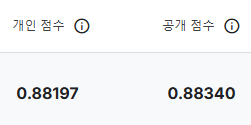

##시각화

In [ ]:
import matplotlib.pyplot as plt
import lightgbm as lgb

혼동 행렬

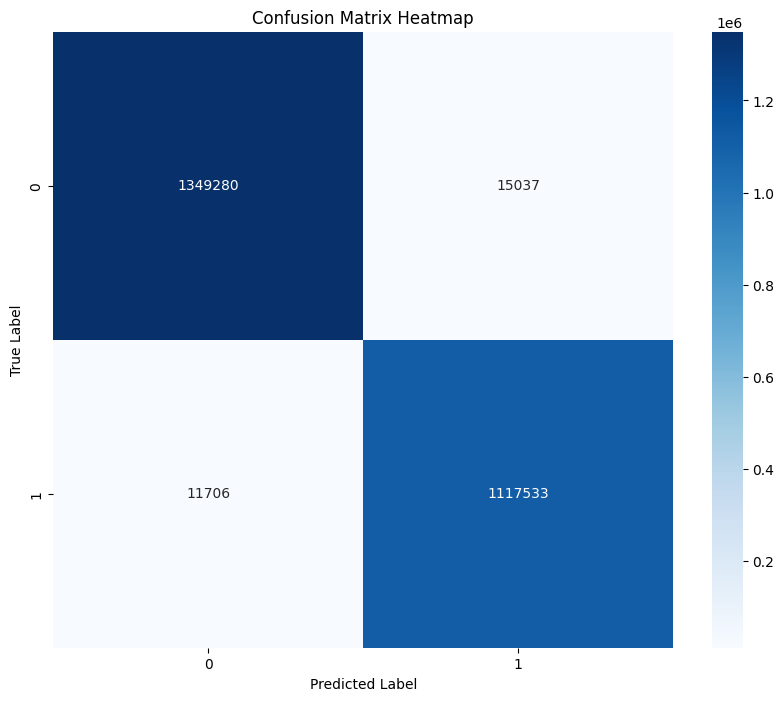

In [ ]:
cm = confusion_matrix(y_test, y_pred)
class_names = np.unique(y)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

중요 특성 시각화

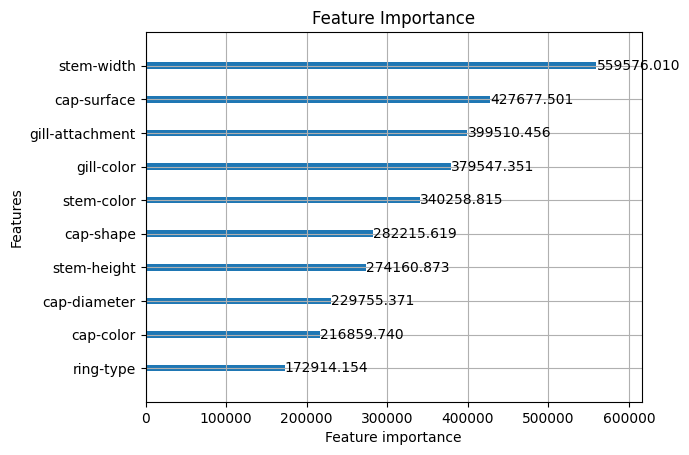

In [ ]:
# 특성 중요도 추출 및 시각화
lgb.plot_importance(model, max_num_features=10, importance_type='gain')
plt.title("Feature Importance")
plt.show()

# importance_type='gain': 각 특성이 정보 획득에 얼마나 기여했는지를 기준으로 중요도를 계산
# max_num_features: 상위 10개의 중요 특성만 표시하도록 설정